Found 20628 images belonging to 36 classes.
Found 1008 images belonging to 36 classes.


C:\Users\heman\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\heman\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


644/644 ━━━━━━━━━━━━━━━━━━━━ 99s 149ms/step - accuracy: 0.4262 - loss: 2.0539
Epoch 2/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.7500 - loss: 0.5054 
Epoch 3/20


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


644/644 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.8797 - loss: 0.3968
Epoch 4/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.9062 - loss: 0.5286 
Epoch 5/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9096 - loss: 0.2943
Epoch 6/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.9062 - loss: 0.4104  
Epoch 7/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.9212 - loss: 0.2417
Epoch 8/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9688 - loss: 0.2051   
Epoch 9/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9304 - loss: 0.2073
Epoch 10/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.9062 - loss: 0.1553  
Epoch 11/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.9343 - loss: 0.1929
Epoch 12/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 1.0000 - loss: 0.0890   
Epoch 13/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.9360 - loss: 0.1865
Epoch 14/20
644/644 ━━━━━━━━━━━━━━━━━━━

Test Loss: 0.042105671018362045 / Test Accuracy: 0.976190447807312


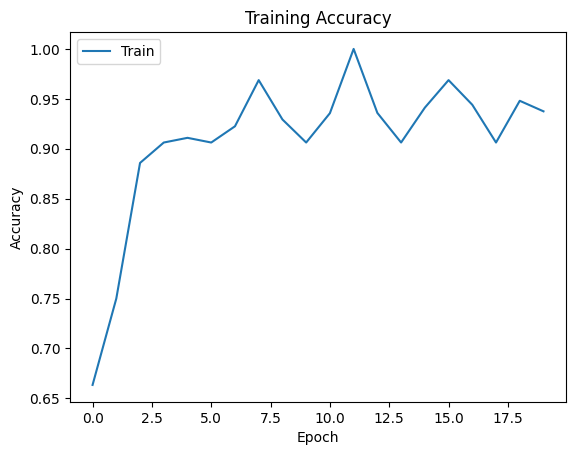

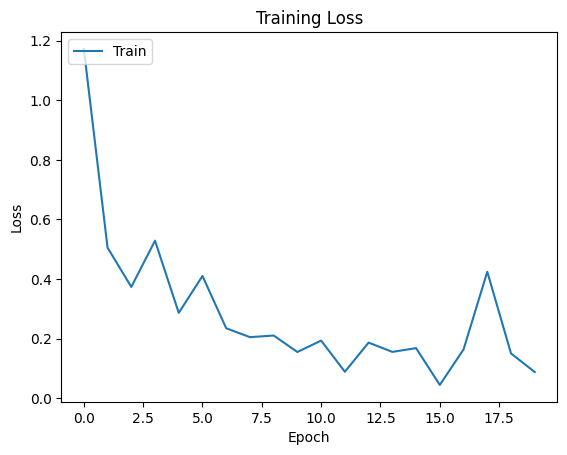

In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Constants
IMG_WIDTH, IMG_HEIGHT = 48, 48
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 26  # Assuming 26 character classes (A-Z)

train_data_dir = '../data/training_data'  # Your training data directory
test_data_dir = '../data/testing_data'   # Your test data directory

# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Rescale test data (without augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# CNN Model
# Adjust NUM_CLASSES to match your dataset
NUM_CLASSES = 36  # Change this to the number of classes you have

# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))  # Ensure this matches NUM_CLASSES

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the training data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Evaluate the model using the testing data
score = model.evaluate(test_generator)
print(f'Test Loss: {score[0]} / Test Accuracy: {score[1]}')

# Save the model
model.save('character_recognition_model.h5')

# Plot training accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

